In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("seoul_lease_transactions.csv")

In [11]:
df.shape

(768140, 29)

In [3]:
df.head()

,Floor,Floor area,Key money,Construction year,Dobong,Dongdaemun,Dongjak,Eunpyeong,Gangbuk,Gangdong,...,Mapo,Nowon,Seocho,Seodaemun,Seongbuk,Seongdong,Songpa,Yangcheon,Yeongdeungpo,Yongsan
0,1,129,38000,1989,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,73,40000,2001,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,141,55000,1988,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,75,29000,2002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,83,40000,1988,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = df.drop(columns={'Key money'})

y = df['Key money']

In [8]:
# Split training and test tests

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [10]:
print(X_train.shape)
print(X_test.shape)

(537698, 28)
(230442, 28)


In [12]:
# Scale features (for linear regression)

from sklearn.preprocessing import MinMaxScaler

# Scaler for x
scaler_x = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.fit_transform(X_test)


In [25]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()

# Model evaluation by cross-validation
lin_reg_score = cross_val_score(lin_reg, X_train_scaled, y_train, verbose = 2)

# Average Coefficient of determination (R^2) on the validation set
print(f'R^2 Validation: {lin_reg_score.mean()}')

c:\users\insakum46\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   0.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ................................................. , total=   0.7s
[CV]  ................................................................
[CV] ................................................. , total=   0.7s
R^2 Validation: 0.6960832646855438


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s finished


In [26]:
#Fit the model to the training set
lin_reg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Compute predictions from the test set
y_pred = lin_reg.predict(X_test_scaled)

In [28]:
# Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {lin_reg.score(X_test_scaled, y_test)}')

R^2 Test: 0.6963492447102411


In [33]:
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE Test: 8743.541969783062


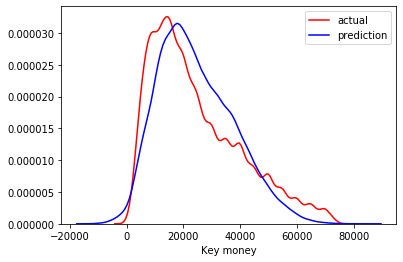

In [36]:
import seaborn as sns

# Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)

# Save the figure to a file
# sns_plot.get_figure().savefig("lin_reg.png")
sns_plot

In [38]:
# 2. Polynomial regression

from sklearn.preprocessing import PolynomialFeatures

# Degree 2
poly_features = PolynomialFeatures(degree = 2)

# Returns a transformed version of X with new combinations of features
X_train_scaled_poly = poly_features.fit_transform(X_train_scaled)
X_test_scaled_poly = poly_features.fit_transform(X_test_scaled)

In [43]:
poly_reg = LinearRegression()

# Model evaluation by cross-validation
poly_reg_score = cross_val_score(poly_reg, X_train_scaled_poly, y_train, verbose = 2)

# Average Coefficient of determination (R^2) on the validation set
print(f'R^2 Validation: {poly_reg_score.mean()}')



c:\users\insakum46\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=  13.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.1s remaining:    0.0s


[CV] ................................................. , total=  14.1s
[CV]  ................................................................
[CV] ................................................. , total=  13.1s
R^2 Validation: 0.7443501925883922


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.7s finished


In [44]:
# Fit the model to the training set
poly_reg.fit(X_train_scaled_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# Compute predictions from the test set
y_pred = poly_reg.predict(X_test_scaled_poly)